# 20-1. PCA를 통한 이미지 잡음 제거

- https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
- 위의 Github 실습을 참고했음

In [1]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
import numpy as np

digits = load_digits()
print("손글씨 이미지의 크기는",digits.data.shape[1],"픽셀 입니다.")

손글씨 이미지의 크기는 64 픽셀 입니다.


In [3]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [7]:
digits.data.shape

(1797, 64)

#### 이미지를 출력하는 함수 정의 및 원본 데이터 출력해보기

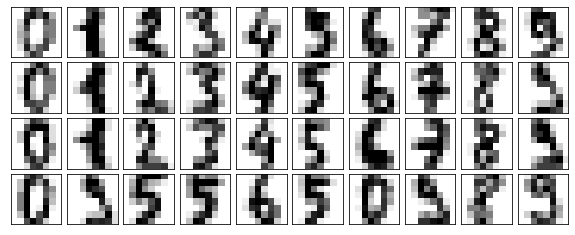

In [8]:
import matplotlib.pyplot as plt

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data) # 원본 손글씨 이미지 출력

### --------------------- DJ's practice -----------------------------

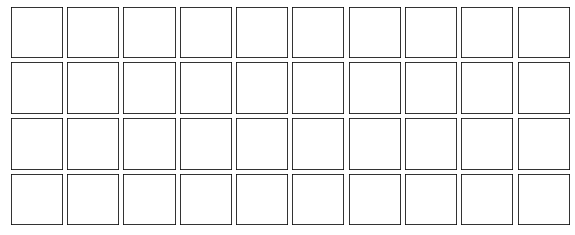

In [21]:
fig, axes = plt.subplots(4, 10, figsize=(10,4),
            subplot_kw={'yticks':[], 'xticks':[]},
             gridspec_kw=dict(hspace=0.1, wspace=0.1)
            )



In [26]:
for i, ax in enumerate(axes):
    print('i:', i)
    print('ax:', ax)

i: 0
ax: [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:>]
i: 1
ax: [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:>]
i: 2
ax: [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:>]
i: 3
ax: [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:>]


In [28]:
axes.flat

### --------------------- end -----------------------------

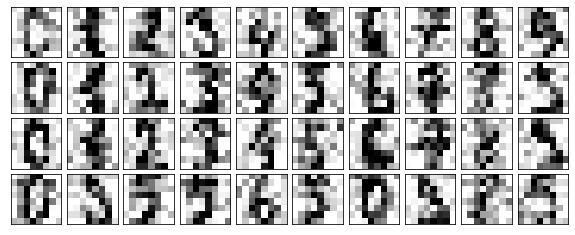

In [29]:
# 잡음넣기

np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy) # 잡음이 섞인 손글씨 이미지 출력

In [31]:
np.random.normal(digits.data)

array([[ 0.65982387, -1.13204668,  5.29854771, ..., -0.80666376,
        -0.54443667, -0.19111626],
       [-0.60023847, -1.63693137, -0.56605958, ...,  7.05055444,
         0.72210269, -0.72050353],
       [-0.5210966 , -0.54933487,  0.28433324, ..., 17.60813154,
         8.00907083,  0.32330646],
       ...,
       [-0.25448018, -0.52692731,  1.61112827, ...,  6.73631267,
        -2.01681528, -0.79049598],
       [ 1.09956505, -1.33732041,  1.85770983, ...,  9.1332841 ,
         0.24829357, -0.36997637],
       [ 0.13585366, -0.87801192, 10.16015333, ..., 11.37967634,
         2.25988686, -0.48567626]])

In [32]:
np.random.normal(digits.data, 4)

array([[ 2.07911454e+00, -1.40891544e+00,  8.54480823e-01, ...,
         4.31560677e+00, -4.50816707e+00,  2.30673580e-03],
       [ 7.21714015e+00, -3.91890245e+00,  3.39029502e+00, ...,
         1.26952118e+01,  5.14574065e+00,  2.04321678e+00],
       [ 2.86028155e+00,  3.51223617e-01,  7.72335418e+00, ...,
         9.82848952e+00,  3.29607516e+00, -2.05595685e+00],
       ...,
       [-6.56325899e+00, -6.94842116e-01,  7.54294235e+00, ...,
         3.32911436e+00, -4.02529731e+00,  2.55033746e+00],
       [ 3.43872945e-01,  4.31381350e+00,  1.99819326e+00, ...,
         1.28646265e+01, -7.06282474e+00,  6.61459029e+00],
       [ 2.77060689e+00, -3.41679953e+00,  7.51082220e+00, ...,
         6.33305788e+00,  2.70115720e+00,  9.50307007e-01]])

In [33]:
np.random.normal(digits.data, 4)

array([[-3.53285043, -2.32903794,  3.65407272, ..., -4.3642161 ,
         3.19311063, -2.437692  ],
       [ 0.70536268,  1.39194156, -2.9866904 , ..., 11.5827146 ,
        -2.63653517, -0.23015631],
       [-5.47998776,  4.19855202, -2.66906556, ..., 16.05260663,
        18.27413151,  1.99171913],
       ...,
       [-0.59972217, -3.49711458, -6.48724495, ...,  1.6160254 ,
         4.6773366 , -3.92462307],
       [-0.25381756,  4.97289382,  0.89059292, ..., 11.25675867,
         4.91405233, -0.64212257],
       [-7.10705788,  2.48784838,  7.97322253, ..., 16.55178662,
         1.44772687,  7.06827414]])

In [34]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

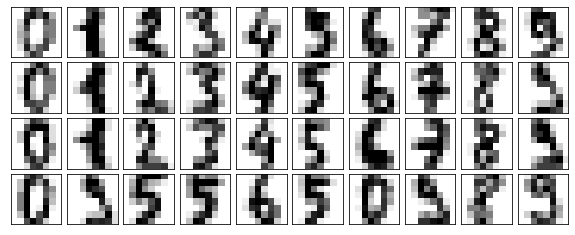

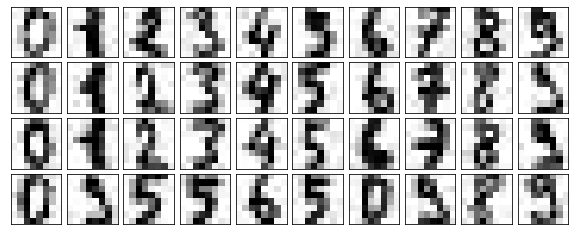

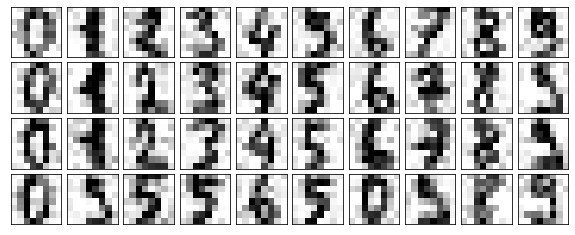

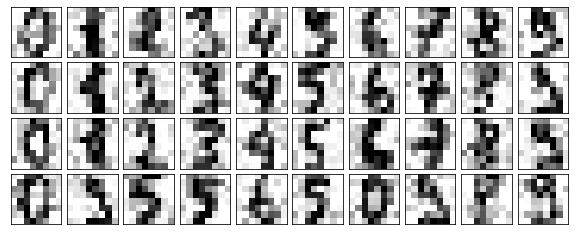

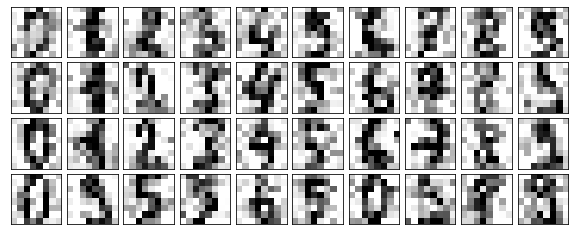

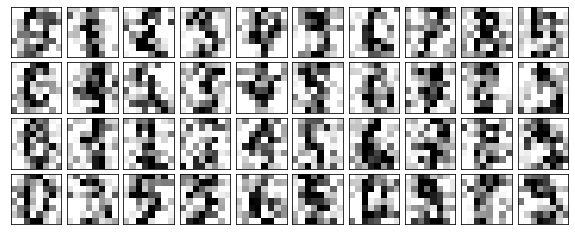

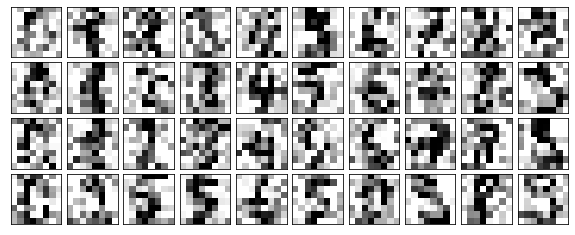

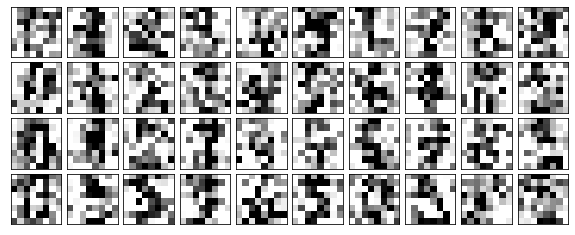

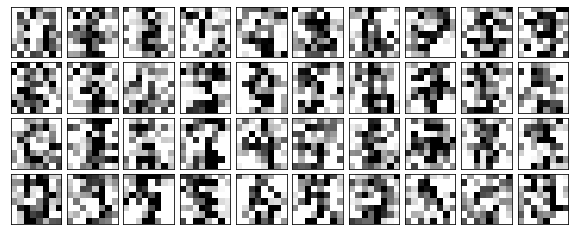

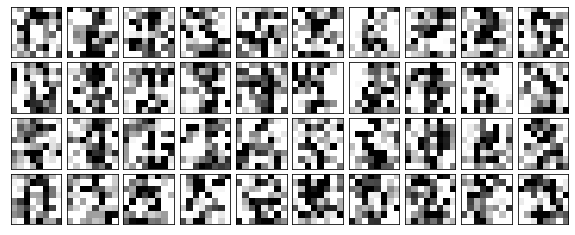

In [35]:
for i in range(10):
    plot_digits(np.random.normal(digits.data, i))

In [36]:
pca = PCA(0.50).fit(noisy) #데이터의 50% 수준(분산 기준)를 표현할 수 있는PCA 기저벡터의 수는?
print("데이터의 50% 수준(분산 기준)까지 복원 가능한 PCA 기저벡터의 수는",pca.n_components_,"개 입니다")

데이터의 50% 수준(분산 기준)까지 복원 가능한 PCA 기저벡터의 수는 12 개 입니다


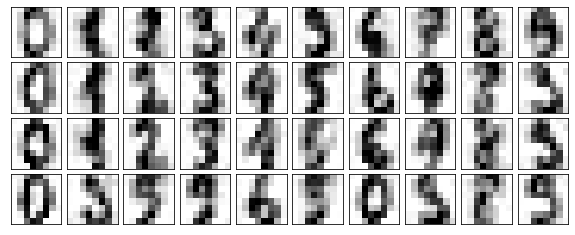

In [37]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered) # 복원된 손글씨 이미지

## ------------------------------------- DJ's practice ------------------------------------------

In [39]:
test_pca = PCA(0.50)

test_pca

PCA(n_components=0.5)

In [40]:
test_pca_fit = test_pca.fit(noisy)
test_pca_fit

PCA(n_components=0.5)

In [42]:
test_pca_fit.n_components_

12

In [43]:
pca.inverse_transform

array([[ -9.82613291,  19.60311879,  -3.49445446, ...,   7.26107832,
          0.58419145,   1.8438046 ],
       [ 14.65827166, -15.58079811,  11.61685625, ...,   5.96816258,
          1.69008628,  -7.38319027],
       [  5.30646513, -14.73205492,   0.26421735, ...,  -4.26313868,
         -2.47186264,  -7.46461662],
       ...,
       [  7.71966027,  -6.95777476,  -6.08565658, ..., -10.8659198 ,
          5.73479747,   5.54420925],
       [ -8.91737494,  11.35437432, -11.91713483, ..., -11.08482921,
          3.23292014,   0.46439398],
       [ -6.88599972,   3.56177468,  14.54014659, ..., -12.42281561,
          0.88588017,  10.20443299]])

In [44]:
filtered

array([[ 2.41042987e-01,  8.44556435e-01,  1.06479115e+01, ...,
         3.24790614e+00,  1.81488255e-03, -1.74913633e-01],
       [ 1.07473665e-01, -1.96428904e-01,  6.01705313e-01, ...,
         9.98670022e+00,  3.98285398e+00,  8.50605231e-01],
       [ 3.20231232e-01, -5.21159240e-01, -2.60882866e+00, ...,
         9.13162583e+00,  3.28708174e+00, -1.05499403e-01],
       ...,
       [ 4.39729573e-01,  4.37965521e-02,  2.94366949e+00, ...,
         4.40779637e+00, -1.64716424e+00,  3.72674661e-01],
       [ 2.15123457e-01,  1.38979729e-01,  3.38129363e+00, ...,
         1.03937945e+01,  1.45823909e+00,  6.98451492e-01],
       [-1.07487531e-01,  2.94227969e-01,  7.68362973e+00, ...,
         1.45826294e+01,  2.02113903e+00,  1.25426720e+00]])

In [45]:
PCA(0.3)

PCA(n_components=0.3)

## ------------------------------------- end ------------------------------------------

## 20-2. PCA를 통한 이미지 압축 및 복원

In [46]:
# 손글씨 데이터 불러오기

from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

digits = load_digits()#[YUOR CODE]
print("손글씨 이미지의 크기는",digits.data.shape[1],"픽셀 입니다.")

손글씨 이미지의 크기는 64 픽셀 입니다.


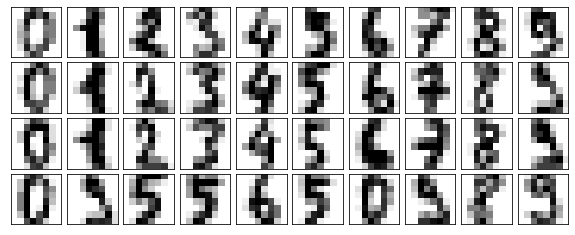

In [47]:
# 이미지 출력하는 함수 정의하기

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data) # 원본 이미지 출력

In [53]:
digits.target[:40].reshape(4,10)

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 9, 5, 5, 6, 5, 0, 9, 8, 9]])

In [54]:
# 데이터의 90% 수준까지의 주성분을 포함하는 PCA객체를 만들고 손글씨 데이터에 적용합니다.

pca = PCA(0.90).fit(digits.data) #데이터의 90% 수준까지 복원 가능한 PCA 기저벡터의 수는?
print("데이터의 90% 수준까지 복원 가능한 PCA 기저벡터의 수는",pca.n_components_,"개 입니다")

데이터의 90% 수준까지 복원 가능한 PCA 기저벡터의 수는 21 개 입니다


In [55]:
type(pca)

sklearn.decomposition._pca.PCA

In [56]:
pca

PCA(n_components=0.9)

In [57]:
# PCA를 통해 21차원으로 축소되었으므로 압축률은(64-21)/64 * 100(%) 이 됩니다.


compression_ratio= (digits.data.shape[1] - pca.n_components_)/digits.data.shape[1] * 100#[YOUR CODE]
print("압축률은",compression_ratio,"% 입니다.")

압축률은 67.1875 % 입니다.


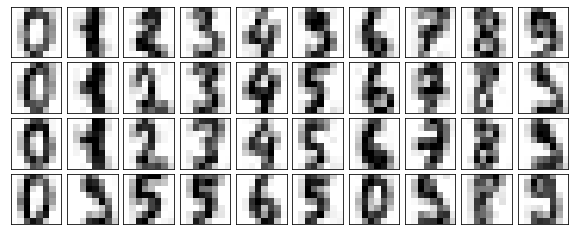

In [58]:
# 축소된 주성분을 inverse_transform을 통해 기존 64차원으로 매핑하여 복원합니다. 그리고 plot_digits함수를 통해 이미지를 확인해봅시다

components = pca.transform(digits.data)
filtered = pca.inverse_transform(components)
plot_digits(filtered) #복원된 이미지

### 결과 : 원본 이미지와 압축 후 다시 복원된 이미지의 퀄리티가 육안으로는 비슷해 보임